In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from PIL import Image
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Data exploration

In [2]:
labels = {
    0: 'badminton',
    1: 'baseball',
    2: 'basketball',
    3: 'boxing',
    4: 'chess',
    5: 'cricket',
    6: 'fencing',
    7: 'football',
    8: 'formula1',
    9: 'gymnastics',
    10: 'hockey',
    11: 'ice_hockey',
    12: 'kabaddi',
    13: 'motogp',
    14: 'shooting',
    15: 'swimming',
    16: 'table_tennis',
    17: 'tennis',
    18: 'volleyball',
    19: 'weight_lifting',
    20: 'wrestling',
    21: 'wwe'
}

Important to replicate the same data folder structure, as it won't be uploaded to git

In [3]:
DATA_DIR = 'input/data/'
DATA_CSV = 'input/data.csv' 

In [4]:
df = pd.read_csv(DATA_CSV)
print(df.head(5), "\n")
print("Shape: \t", df.shape)
print("Number of different classes: ", len(df['target'].unique()))

                             image_path  target
0    input/data/gymnastics/00000774.jpg     9.0
1  input/data/table_tennis/00000702.jpg    16.0
2       input/data/fencing/00000275.jpg     6.0
3      input/data/baseball/00000380.jpg     1.0
4       input/data/cricket/00000303.jpg     5.0 

Shape: 	 (13800, 2)
Number of different classes:  22


/home/lewis/.virtualenvs/uc3m/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


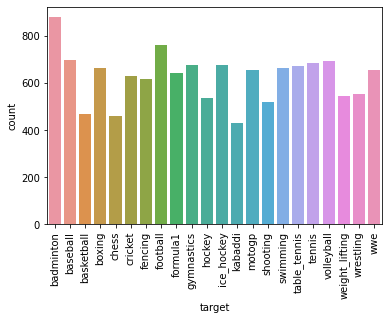

In [5]:
ax = sns.countplot(
    df['target'],
    
)
ax.set_xticklabels(labels.values(), rotation=90);

### Creating panda datasets

In [6]:
train_df, val_df, test_df = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])


In [7]:
train_df.shape, val_df.shape, test_df.shape

((11040, 2), (1380, 2), (1380, 2))

In [8]:
train_df.reset_index(inplace=True)
val_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [9]:
print(train_df.head(5))


   index                              image_path  target
0   1108      input/data/volleyball/00000175.JPG    18.0
1   4467             input/data/wwe/00000373.jpg    21.0
2   6198          input/data/tennis/00000719.jpg    17.0
3   6980         input/data/kabaddi/00000186.jpg    12.0
4   6493  input/data/weight_lifting/00000602.jpg    19.0


In [10]:
print(train_df["image_path"][0])


input/data/volleyball/00000175.JPG


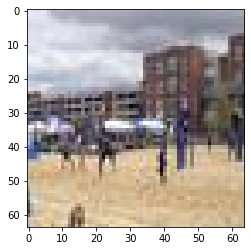

In [11]:
img = Image.open(train_df["image_path"][0])
plt.imshow(img)

### Auxiliar functions

In [12]:
def decode_image(img):
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels = 3)
    # Optional resize
    #return tf.image.resize(img, [img_height, img_widht])
    return img

In [13]:
def process_path(file_path):

    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    
    img = decode_image(img)
    return img.numpy().tolist()

### Creating the train dataset

In [14]:
# List of paths and labels
list_ds = tf.data.Dataset.from_tensor_slices(train_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(train_df["target"].to_list())

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
train_ds = list_ds
train_ds_labels = label_ds

AttributeError: in user code:

    <ipython-input-13-b6e0726a0523>:7 process_path  *
        return img.numpy().tolist()

    AttributeError: 'Tensor' object has no attribute 'numpy'


In [15]:
# Checking
print(train_ds.element_spec)
for image, label in zip(train_ds.take(1), train_ds_labels.take(1)):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

NameError: name 'train_ds' is not defined

### Creating the test and validation dataset

In [19]:
# List of paths and labels

list_ds = tf.data.Dataset.from_tensor_slices(test_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(test_df["target"].to_list())

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
test_ds = list_ds
test_ds_labels = label_ds

In [20]:
# List of paths and labels

list_ds = tf.data.Dataset.from_tensor_slices(val_df["image_path"].to_list())
label_ds = tf.data.Dataset.from_tensor_slices(val_df["target"].to_list())

# Using Dataset.map to create datasets from (image, label) tuples
# Setting parrallel calls to parallelize the process
AUTOTUNE = tf.data.experimental.AUTOTUNE
list_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

#Concat images and labels
valid_ds = list_ds
valid_ds_labels = label_ds

### Set comprobations

In [21]:
# Checking the lenghts
print(test_ds.element_spec)
print(valid_ds.element_spec)


TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None)
TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None)


In [22]:
for image, label in zip(test_ds.take(1), test_ds_labels.take(1)):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (64, 64, 3)
Label:  15.0


In [23]:
for image, label in zip(valid_ds.take(1), valid_ds_labels.take(1)):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (64, 64, 3)
Label:  11.0


In [66]:
counter = 0
for image, label in train_ds:
  counter +=1
print("Train dataset tiene: ", counter)
counter = 0
for image, label in test_ds:
  counter +=1
print("Test dataset tiene: ", counter)
counter = 0
for image, label in valid_ds:
  counter +=1
print("Valid dataset tiene: ", counter)

<ParallelMapDataset shapes: (None, None, 3), types: tf.uint8>

### Visualizing TF datasets

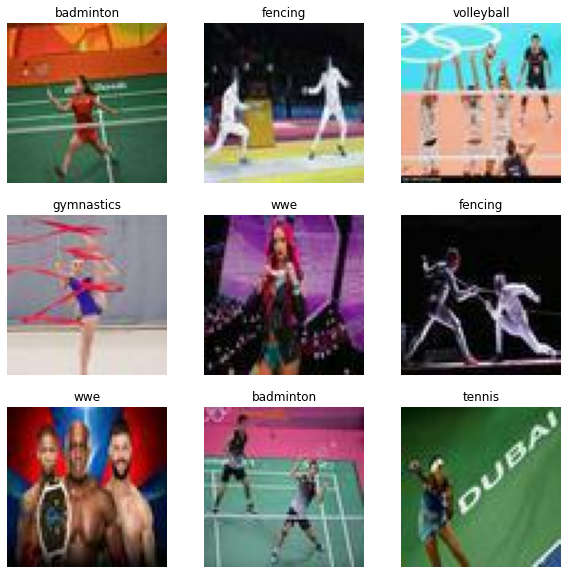

In [25]:
plt.figure(figsize=(10, 10))
i = 0
for image, label in zip(train_ds.take(9), train_ds_labels.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(labels[label.numpy()])
    plt.axis("off")
    i+=1

## CNN

In [82]:
num_classes =1

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(64, 64, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 64)        

In [96]:
from keras.preprocessing.image import ImageDataGenerator
a =map(process_path, train_df['image_path'].to_list())
a = np.array(list(a))
print(a.shape)
train_datagen = ImageDataGenerator(rescale=1./255)


prueba = train_datagen.flow(a, train_df['target'].to_numpy())

(11040,)


ValueError: setting an array element with a sequence.

In [94]:
epochs=10

history = model.fit(
  a,
  y = train_df['target'].to_list(),
  validation_data=valid_ds,
  epochs=epochs
)

ValueError: `y` argument is not supported when using python generator as input.